# Introduction #

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex4 import *

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss: 0.1992


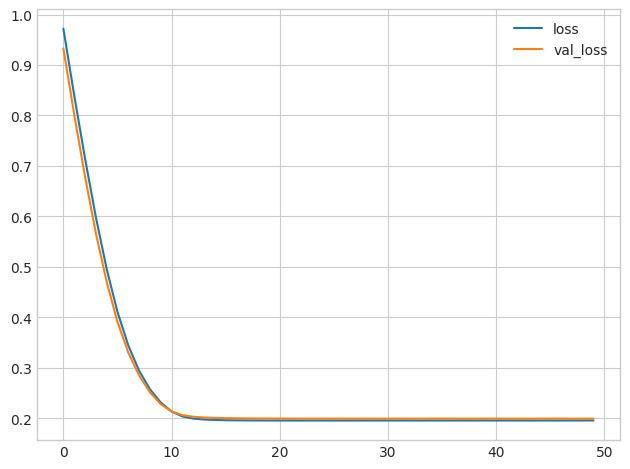

In [4]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.1992


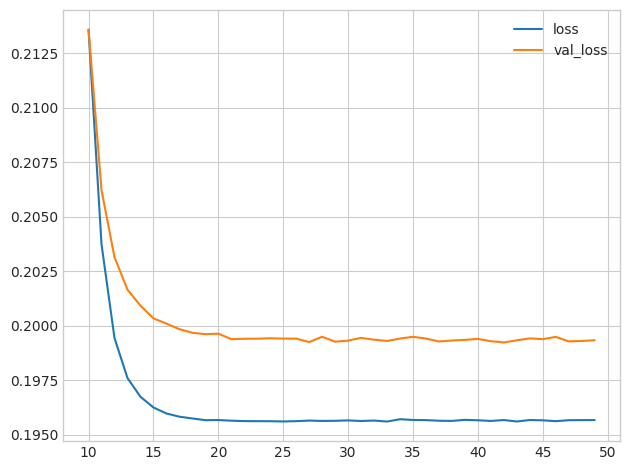

In [5]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 1) Evaluate Baseline


In [8]:
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.2144 - val_loss: 0.2064
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1969 - val_loss: 0.2020
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1926 - val_loss: 0.1996
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1908 - val_loss: 0.1997
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1898 - val_loss: 0.2003
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1878 - val_loss: 0.1984
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1870 - val_loss: 0.1988
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1860 - val_loss: 0.1980
Epoch 9/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1847 - val_loss: 0.1984
Epoch 10/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1840 - val_loss: 0.1984
Epoch 11/50
49/49 [

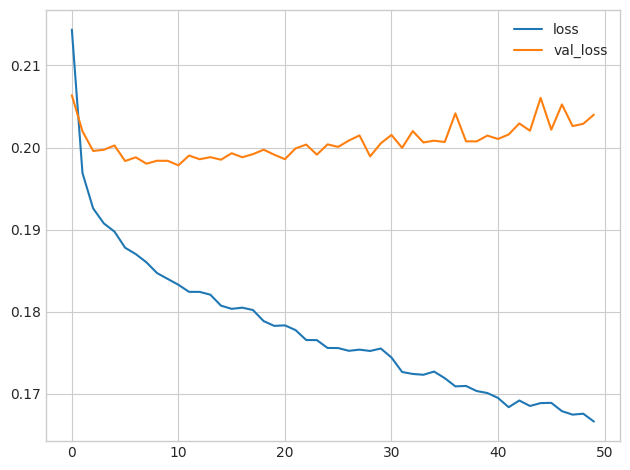

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 2) Add Capacity

In [10]:
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Now the validation loss begins to rise very early, while the training loss continues to decrease. This indicates that the network has begun to overfit. At this point, we would need to try something to prevent it, either by reducing the number of units or through a method like early stopping. (We'll see another in the next lesson!)

# 3) Define Early Stopping Callback

In [12]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Epoch 1/50
49/49 [==============================] - 1s 9ms/step - loss: 0.2313 - val_loss: 0.2086
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1998 - val_loss: 0.2021
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1947 - val_loss: 0.2025
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1923 - val_loss: 0.2012
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1904 - val_loss: 0.2009
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1882 - val_loss: 0.2005
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1872 - val_loss: 0.2002
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1861 - val_loss: 0.1993
Epoch 9/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1849 - val_loss: 0.2007
Epoch 10/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1839 - val_loss: 0.1990
Epoch 11/50
49/49 [

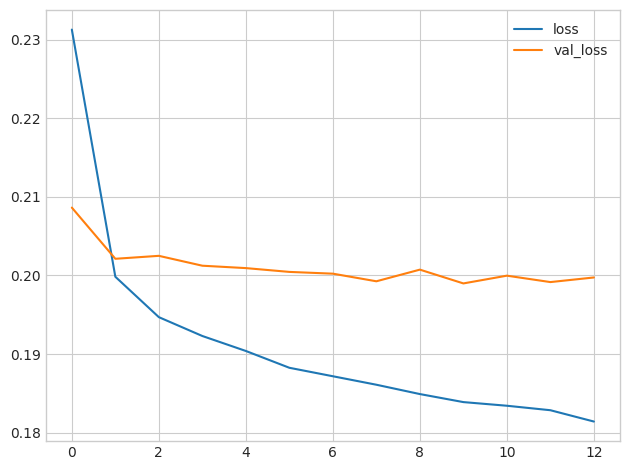

In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 4) Train and Interpret

In [14]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.